In [ ]:
#Dataset from :https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 5.00MB/s]


In [ ]:

!mkdir dataset
!unzip customer-segmentation-tutorial-in-python.zip -d dataset

mkdir: cannot create directory ‘dataset’: File exists
Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: dataset/Mall_Customers.csv  


**Import Necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

**Import data**

In [ ]:
df = pd.read_csv('/content/dataset/Mall_Customers.csv')
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

**Null values Check**

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Duplicated Values Check**

In [ ]:
df.duplicated().sum()

0

**EDA**

<Axes: xlabel='Gender', ylabel='count'>

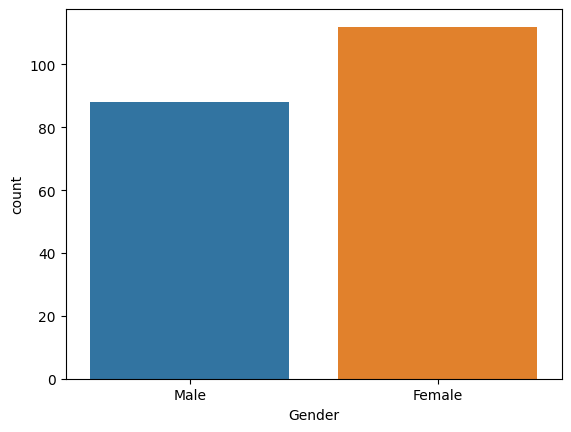

In [ ]:
sns.countplot(x=df['Gender']) #number of gender

<Axes: xlabel='Age', ylabel='Count'>

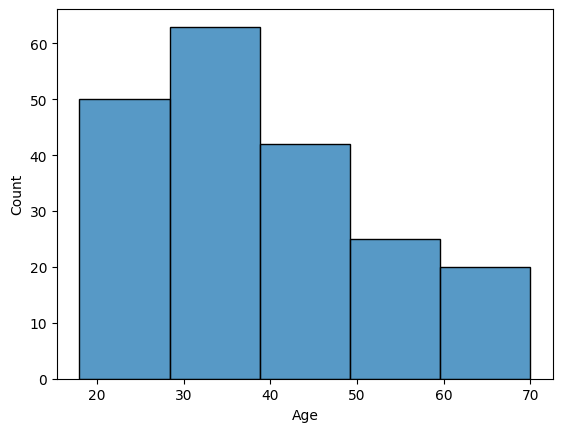

In [ ]:
sns.histplot(x=df['Age'], bins = 5) # Range Age

In [ ]:
print('Minimum age:',df['Age'].min(), 'Maximum age:', df['Age'].max())

Minimum age: 18 Maximum age: 70


**Drop columns Customer ID**

In [ ]:
df_new = df.drop('CustomerID', axis=1)
df_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Label Encoding with column Gender**

In [ ]:
labelen = LabelEncoder()
df_new['Gender'] = labelen.fit_transform(df_new['Gender'])
df_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
df_new.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

**KMeans Clustering**

In [ ]:
X = df_new.values

In [ ]:
wcss = []

for i in range(1,13):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

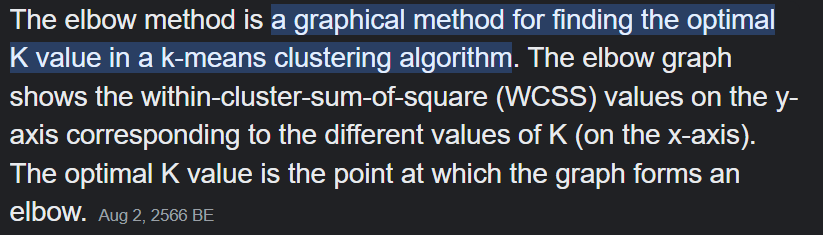

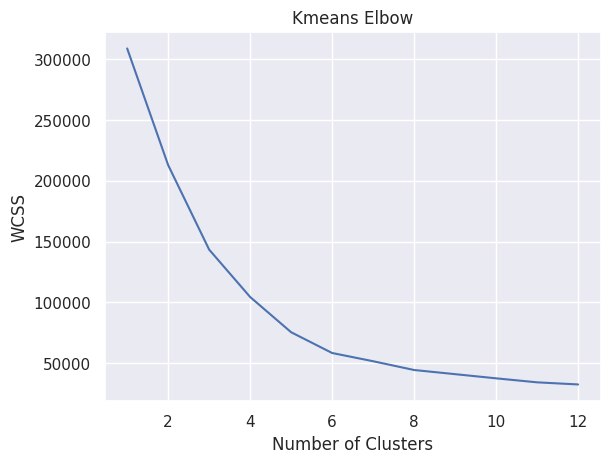

In [ ]:
sns.set()
plt.plot(range(1,13), wcss)
plt.title('Kmeans Elbow')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Training K-Means Clustering Model**

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

y = kmeans.fit_predict(X)
print(y)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Ploting Cluster point**

In [ ]:
kmeans.cluster_centers_

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

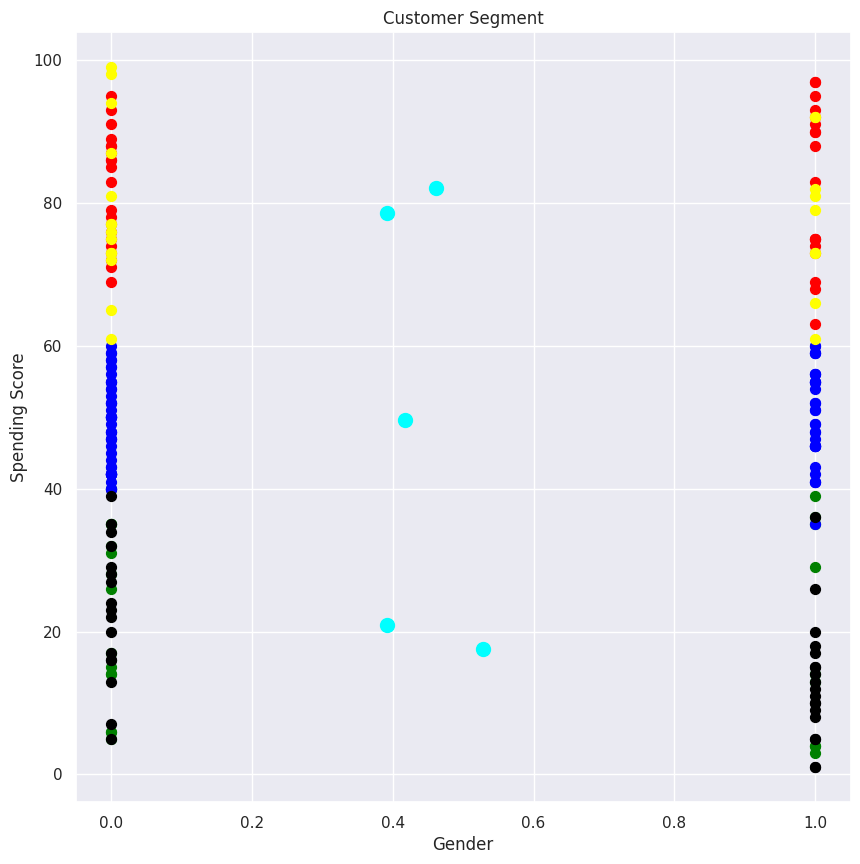

In [ ]:
plt.figure(figsize=(10,10))  #inefficient
plt.scatter(X[y==0,0], X[y==0,3], s=50, c='green', label='Cluster 0')
plt.scatter(X[y==1,0], X[y==1,3], s=50, c='red', label='Cluster 1')
plt.scatter(X[y==2,0], X[y==2,3], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y==3,0], X[y==3,3], s=50, c='black', label='Cluster 3')
plt.scatter(X[y==4,0], X[y==4,3], s=50, c='yellow', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,3],s=100, c='cyan', label='Centroids')

plt.title('Customer Segment')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()

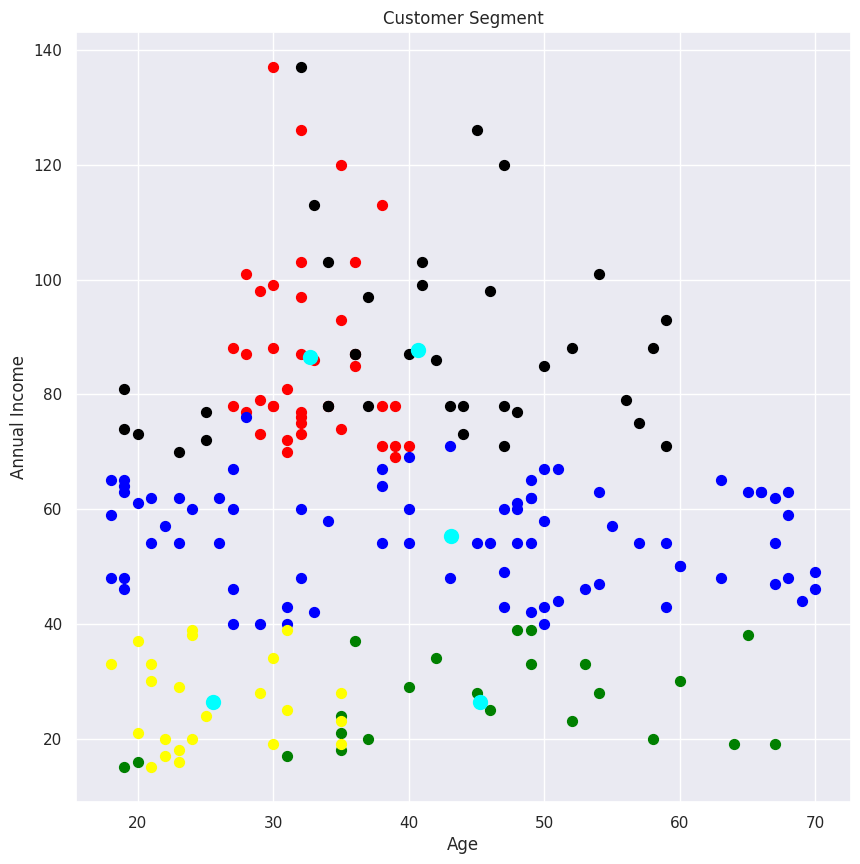

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X[y==0,1], X[y==0,2], s=50, c='green', label='Cluster 0')
plt.scatter(X[y==1,1], X[y==1,2], s=50, c='red', label='Cluster 1')
plt.scatter(X[y==2,1], X[y==2,2], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y==3,1], X[y==3,2], s=50, c='black', label='Cluster 3')
plt.scatter(X[y==4,1], X[y==4,2], s=50, c='yellow', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2],s=100, c='cyan', label='Centroids')

plt.title('Customer Segment')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

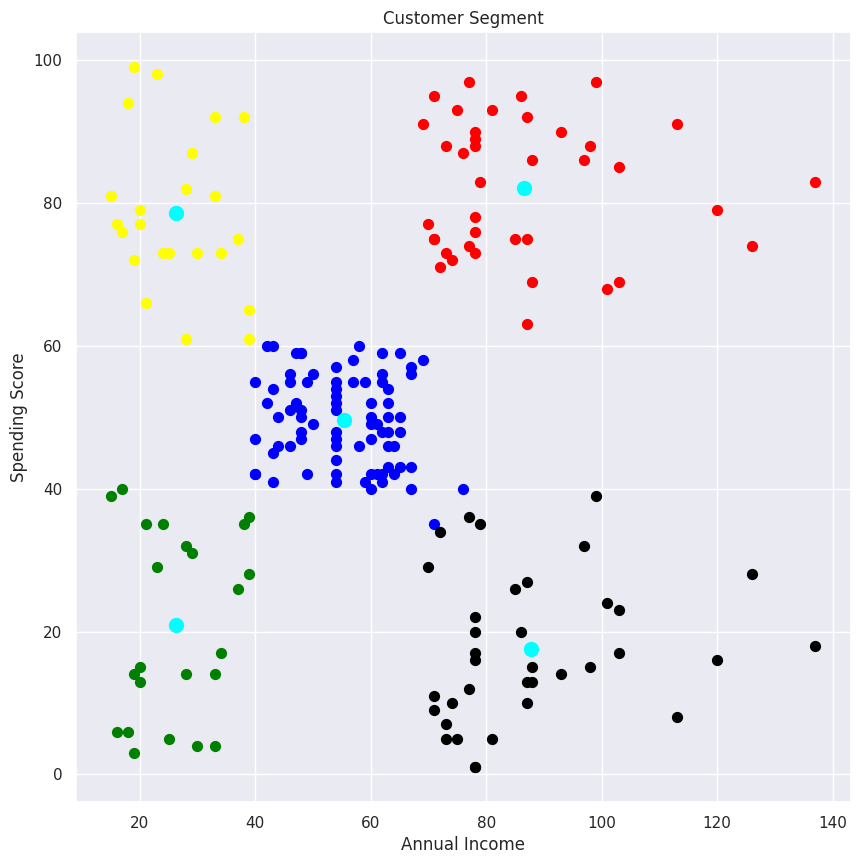

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X[y==0,2], X[y==0,3], s=50, c='green', label='Cluster 0')
plt.scatter(X[y==1,2], X[y==1,3], s=50, c='red', label='Cluster 1')
plt.scatter(X[y==2,2], X[y==2,3], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y==3,2], X[y==3,3], s=50, c='black', label='Cluster 3')
plt.scatter(X[y==4,2], X[y==4,3], s=50, c='yellow', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3],s=100, c='cyan', label='Centroids')

plt.title('Customer Segment')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

**We can segment by using Annual Income and Spending Score.**
